# Programming Lesson and Exercises - DMM

The goal of these programming lesson and exercises is to teach you how to model data using Python.
In particular, you will learn how to fit regression, classification, and clustering models to a data set.


This notebook has the following structure:

- The first part introduces the concepts for this week. The theory is interleaved with small exercises, which have the goal of letting you practice the concepts that were just intruduced.
- At the end there are one or more larger exercises, which have the goal to test what you have learned earlier. These will be more difficult and will require more independent work than the exercises in the first part.

All exercises can be solved with the concepts that were introduced earlier. Since there are often more than one correct way to solve a programming problem, we try to accept various correct anwers. However, many of the automatic tests in Momotor (see _How to submit your work_ below) assume that your answers are constructed using the concepts introduced in these notebooks. If you look for answers on the Internet (e.g. if you import other libraries) you run the risk that your answers will be rejected.

Some of the small exercises can be solved by copy-pasting code from the examples. However, it is up to you to try to solve the exercises yourself, which will help you learn, before copy-pasting the answers. The ease of looking up answers is meant to provide guidance when you get stuck, especially for those of you who are new to programming.

For your convenience, in the `support` directory you will find a summary of the Python methods introduced in this notebook.



# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2023-11-01') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Abdullah Alhariri'
AUTHOR_ID_NR = '2184796'
AUTHOR_DATE = '2024-11-26'

#// END_TODO [Author]

## Table of Contents

- [Learning Objectives](#Learning-Objectives)
- [Loading the Libraries](#Loading-the-Libraries)
- [Data Sets](#Data-Sets) 
  - [Example Data Set](#Example-Data-Set) 
    - [Training and Test Data Set](#Training-and-Test-Data-Set)
  - [Auto MPG Data Set](#Auto-MPG-Data-Set) 
    - [Training and Test Data Set](#Training-and-Test-Data-Set)
  - [Wheat Seeds Data Set](#Wheat-Seeds-Data-Set)
- [1. Linear Regression](#1.-Linear-Regression) 
  - [Step 1. Select the Data](#Step-1.-Select-the-Data)
  - [Step 2. Create the Regression Object](#Step-2.-Create-the-Regression-Object)
  - [Step 3. Fit the Model](#Step-3.-Fit-the-Model)
  - [Step 4. Extract Model Parameters](#Step-4.-Extract-Model-Parameters)
  - [Step 5. Visualze the Model](#Step-5.-Visualize-the-Model)
  - [Step 6. Make Predictions](#Step-6.-Make-Predictions)
  - [Step 7. Assess the Model's Quality](#Step-7.-Assess-the-Model's-Quality) 
    - [Step 7.a Goodness of Fit](#Step-7.a-Goodness-of-Fit)
    - [Step 7.b Predictive Performance](#Step-7.b-Predictive-Performance)
  - [Exercises on Linear Regression](#Exercises-on-Linear-Regression) 
    - [Exercise 1.a: Fit a Linear Model for `mpg`](#Exercise-1.a:-Fit-a-Linear-Model-for-mpg)
    - [Exercise 1.b: Visualize the Model](#Exercise-1.b:-Visualize-the-Model)
    - [Exercise 1.c: Interpret the Model](#Exercise-1.c:-Interpret-the-Model)
    - [Exercise 1.d: Assess the Goodness of Fit](#Exercise-1.d:-Assess-the-Goodness-of-Fit)
    - [Residual Plot](#Residual-Plot)
    - [Exercise 1.e: Fit a Linear Model with a Quadratic Term](#Exercise-1.e:-Fit-a-Linear-Model-with-a-Quadratic-Term)
    - [Exercise 1.f: Extract Model Parameters](#Exercise-1.f:-Extract-Model-Parameters)
    - [Exercise 1.g: Visualize the Model with a Quadratic Term](#Exercise-1.g:-Visualize-the-Model-with-a-Quadratic-Term)
    - [Exercise 1.h: Did the Goodness of Fit Improve?](#Exercise-1.h:-Did-the-Goodness-of-Fit-Improve?)
    - [Exercise 1.i: Make Predictions](#Exercise-1.i:-Make-Predictions)
    - [Exercise 1.j: Assess the Predictive Performance](#Exercise-1.j:-Assess-the-Predictive-Performance)
- [2. Decision Tree Mining](#2.-Decision-Tree-Mining) 
  - [Step 1. Select the Data](#Step-1.-Select-the-Data)
  - [Step 2. Create the Decision-tree Classifier](#Step-2.-Create-the-Decision--tree-Classifier)
  - [Step 3. Do the Fitting](#Step-3.-Do-the-Fitting)
  - [Step 4. Extract Model Parameters](#Step-4.-Extract-Model-Parameters)
  - [Step 5. Visualze the Model](#Step-5.-Visualize-the-Model)
  - [Step 6. Make Predictions](#Step-6.-Make-Predictions)
  - [Step 7. Assess the Model's Quality](#Step-7.-Assess-the-Model's-Quality) 
    - [Step 7.a Goodness of Fit](#Step-7.a-Goodness-of-Fit)
    - [Step 7.b Predictive Performance](#Step-7.b-Predictive-Performance)
  - [Exercises on Decision Trees](#Exercises-on-Decision-Trees) 
    - [Exercise 2.a: Fit a Decision Tree for `origin`](#Exercise-2.a:-Fit-a-Decision-Tree-for-origin)
    - [Exercise 2.b: Assess the Goodness of Fit](#Exercise-2.b:-Assess-the-Goodness-of-Fit)
    - [Exercise 2.c: Visualize the Model](#Exercise-2.c:-Visualize-the-Model)
    - [Exercise 2.d: Assess the Predictive Performance](#Exercise-2.d:-Assess-the-Predicitve-Performance)
- [3. Clustering](#3.-Clustering) 
  - [Step 1. Select the Data](#Step-1.-Select-the-Data)
  - [Step 2. Create the Cluster Object](#Step-2.-Create-the-Cluster-Object)
  - [Step 3. Fit the Model](#Step-3.-Fit-the-Model)
  - [Step 4. Extract Model Parameters](#Step-4.-Extract-Model-Parameters)
  - [Step 5. Visualze the Model](#Step-5.-Visualize-the-Model)
  - [Step 6. Make Predictions](#Step-6.-Make-Predictions)
  - [Step 7. Assess the Model's Quality](#Step-7.-Assess-the-Model's-Quality) 
  - [Exercises on Clustering](#Exercises-on-Clustering) 
    - [Exercise 3.a: Cluster the Wheat Seeds](#Exercise-3.a:-Cluster-the-Wheat-Seeds)
    - [Exercise 3.b: Visualize the Cluster](#Exercise-3.b:-Visualize-the-Cluster)
    - [Exercise 3.c: Make Predictions](#Exercise-3.c-Make-Predictions)
    - [Exercise 3.d: Assess the Model's Quality](#Exercise-3.d:-Assess-the-Model's-Quality)
    - [Exercise 3.e: Compare with the Actual Seeds Varieties](#Exercise-3.e:-Compare-with-the-Actual-Seeds-Varieties)
- [4. Exercise: Different Models for Linear Regression](#4.-Exercise:-Different-Models-for-Linear-Regression) 
  - [Exercise 4.a: Fit a Linear Model for `mpg` with a Cross Term and a Quadratic Term](#Exercise-4.a:-Fit-a-Linear-Model-for-mpg-with-a-Cross-Term-and-a-Quadratic-Term)
  - [Exercise 4.b: Did the Goodness of Fit Improve](#Exercise-4.b:-Did-the-Goodness-of-Fit-Improve)
  - [Exercise 4.c: Did the Predictive Performance Improve?](#Exercise-4.c:-Did-the-Predictive-Performance-Improve?)
- [5. Exercise: Depths of Decision Trees](#5.-Exercise:-Depths-of-Decision-Trees) 
  - [Exercise 5.a: Fit a Decision Tree of Unbounded Maximum Depth](#Exercise-5.a:-Fit-a-Decision-Tree-of-Unbounded-Maximum-Depth)
  - [Exercise 5.b: Extract Model Parameters](#Exercise-5.b:-Extract-Model-Parameters)
  - [Exercise 5.c: Assess the Goodness of Fit](#Exercise-5.c:-Assess-the-Goodness-of-Fit)
  - [Exercise 5.d: Assess the Predictive Performance](#Exercise-5.d:-Assess-the-Predictive-Performance)
  - [Exercise 5.e: Which Tree is More Appropriate?](#Exercise-5.e:-Which-Tree-is-More-Appropriate?)

## Learning Objectives

After this lesson, you should

* know how to do **linear regression** on data frames
* know how to do **decision tree mining** on data frames
* know how to do **k-means clustering** on data frames
* know how to determine the **$R^2$** statistic of a linear regression model
* know how to determine the **accuracy** of a classification model

## Loading the Libraries

Execute the following code cell to load and initialize the relevant data analytics libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns                       # also improves the look of plots

# Configure plots
sns.set()                                   # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5      # default hor./vert. size of plots, in inches

# Reveal a hint only while holding the mouse down
from IPython.display import HTML
HTML('<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>')

In these exercises, we will rely on `sklearn` (*SciKit Learn*), a Python library for machine learning. Now, we selectively import the relevant classes and functions from `sklearn`. Its documentation can be found here: http://scikit-learn.org/.

In [3]:
from sklearn.linear_model import LinearRegression                   # for linear regression
from sklearn.cluster import KMeans                                  # for clustering
from sklearn.tree import DecisionTreeClassifier                     # for decision tree mining
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from files.treeviz import tree_print                                # to print a decision tree
from sklearn import tree

# KMeans: Suppress a FutureWarning about a default argument and a UserWarning about an unlikely (in our setting) memory leak
import warnings
warnings.filterwarnings('ignore', message="The default value of `n_init`*.", category=FutureWarning)
warnings.filterwarnings('ignore', message="KMeans is known to*.", category=UserWarning)

> **Warning:** Data mining methods often include a random component and are therefore **non-deterministic**. This means that some of the data mining methods can return different answers every time they are executed, even when the same input data is used.

## Data Sets

Throughout this notebook, we will use three data sets:
- The **example** data set will be used to introduce the data mining techniques;
- the **auto MPG** data set will be used in the exercises for linear regression and decision tree mining, and;
- the **wheat seeds** data set will be used in the exercises for clustering.

### Example Data Set

We will use a small idealized data set to demonstrate the use of the methods in the SciKit Learn library. The example data set has two numeric columns labeled `'a'` and `'b'`, one categorical column labeled `'c'`, and twelve rows.

In [4]:
df_example = pd.DataFrame([[0, 1, 'red'], [1, 2, 'red'], [2, 1, 'red'],
                           [3, 3, 'blue'], [4, 2, 'blue'], [5, 3, 'blue'],
                           [4, 7, 'orange'], [5, 8, 'orange'], [6, 7, 'orange'],
                           [7, 9, 'black'], [8, 8, 'black'], [9, 9, 'black']],
                        columns=['a', 'b', 'c'])
df_example

,a,b,c
0,0,1,red
1,1,2,red
2,2,1,red
3,3,3,blue
4,4,2,blue
5,5,3,blue
6,4,7,orange
7,5,8,orange
8,6,7,orange
9,7,9,black


Here is a scatter plot of the example data set:

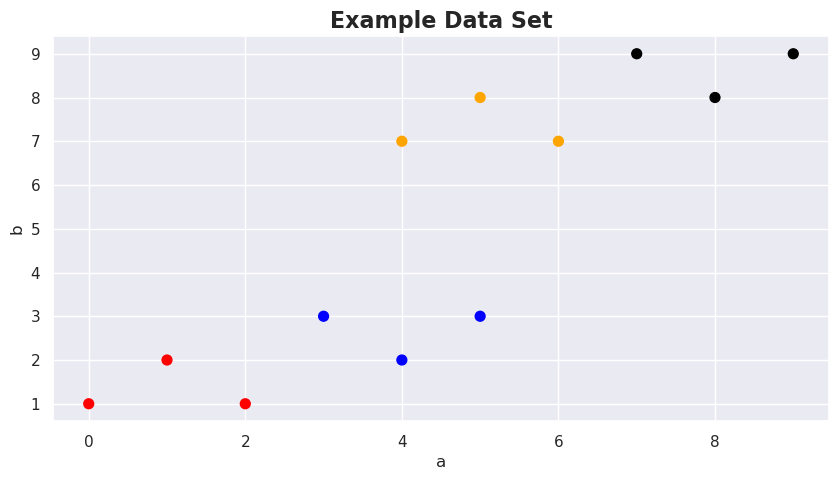

In [5]:
df_example.plot(kind='scatter', x='a', y='b', s=50, c=df_example['c'])
plt.title('Example Data Set', weight='bold', size=16);

#### Training and Test Data Set

After training a model on a given data set, we usually want to use it to predict something about new data points.
For evaluating the predictive performance of a trained model, we thus need a test set that is separate from the training set.
For this purpose, we divide the whole data set into a _training set_ and a _test set_.
The models are then fit using the _training set_ alone, and the predictions are evaluated using the *test set*.

The easiest way to make this division is to randomly assign each data point to either the training or the test set.
In the next code cell, we use the built-in `sklearn` function `train_test_split()` to randomly split the data in `df_example` into two data frames `df_example_train` and `df_example_test`.
The `test_size` parameter causes 20% of the data points to be assigned to the test set.
We also fix the random state, which ensures replicability. 

> **Note:** Randomly splitting a data set is not always the best approach. The `sklearn` library contains many more sophisticated methods, some of which are well suited for specific types of data.
For example, data that is chronologically ordered (time series data) should be separated chronologically into consecutive training and test sets.
See the SciKit Learn [User Guide](https://scikit-learn.org/stable/modules/cross_validation.html) for more information.
In this set of exercises however, we only consider random splitting using `train_test_split`.

In [6]:
df_example_train, df_example_test = train_test_split(df_example, test_size=0.2, random_state=7) # random_state is to control the random number generated

Here is a scatter plot of the training and test data sets.

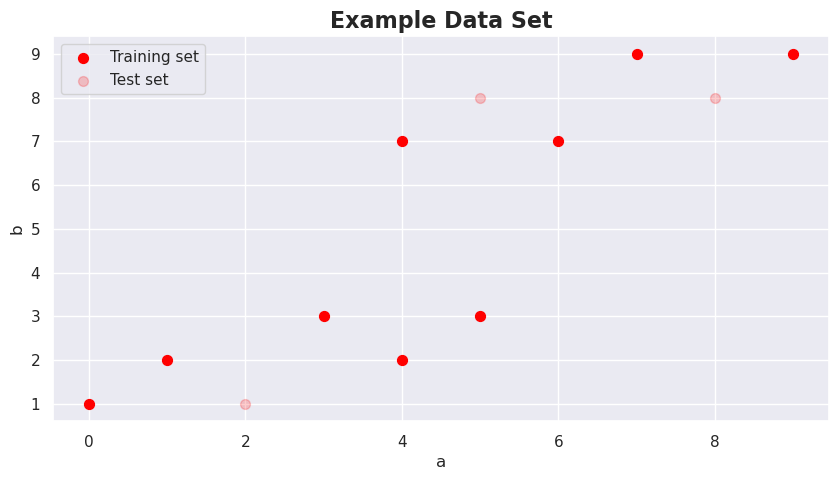

In [7]:
ax = df_example_train.plot(kind='scatter', x='a', y='b', s=50, c='red')
df_example_test.plot(kind='scatter', x='a', y='b', s=50, c='red', alpha=0.2, ax=ax)
ax.legend(['Training set', 'Test set'])
ax.set_title('Example Data Set', weight='bold', size=16);

> **Important:** We will use the *training set* for training the models, and the *test set* for testing the trained models.

### Auto MPG Data Set

The **Auto MPG** data set (see the file `auto-mpg.csv`) explores the fuel efficiency of cars, measured in Miles Per Gallon (MPG);
the higher this number, the more efficient the car. In the following exercises, we will use this data set to make predictions about the fuel efficiency of a car based on its other properties. 

Find below an overview of the data set columns.

|Column  | Type | Description | 
|:-------|:----|:----|
|mpg|          continuous| fuel efficiency in miles per gallon; higher value is more efficient|
|cylinders|     multi-valued discrete| number of cylinders|
|displacement|  continuous| volume of cylinders; in cubic inches|
|horsepower|    continuous| engine power; in horsepower (hp)|
|weight|        continuous| car mass; in pounds (lbs)|
|acceleration|  continuous| time to accelerate from 0 to 60 mph; in seconds (s)|
|year|    multi-valued discrete| last two digits of the model year|
|origin|        multi-valued discrete| 1. American, 2. European, 3. Japanese|
|name|      string| make and model; not unique|

#### Training and Test Data Set

In the next code cell, we load the full data set into the data frame `df_mpg`. Next, we use the built-in `sklearn` function `train_test_split()` to split the data into data frames `df_mpg_train` and `df_mpg_test`.

> **Important:** We will use the former for training the models, and the latter for testing the trained models.

In [8]:
df_mpg = pd.read_csv('datasets/auto-mpg.csv')
df_mpg_train, df_mpg_test = train_test_split(df_mpg, test_size=0.2, random_state=7)

# Create a copy(), in case train_test_split() returns a view
df_mpg_train = df_mpg_train.copy()
df_mpg_test = df_mpg_test.copy()

df_mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490.0,15.7,81,American,plymouth reliant
173,24.0,4,119.0,97.0,2545.0,17.0,75,Japanese,datsun 710
331,33.8,4,97.0,67.0,2145.0,18.0,80,Japanese,subaru dl
53,31.0,4,71.0,65.0,1773.0,19.0,71,Japanese,toyota corolla 1200
351,34.4,4,98.0,65.0,2045.0,16.2,81,American,ford escort 4w


Consider the following columns:

* mpg, cylinders, displacement, horsepower, weight, acceleration

Which correlations do you expect?

You can check your expectations against the following scatter plots.

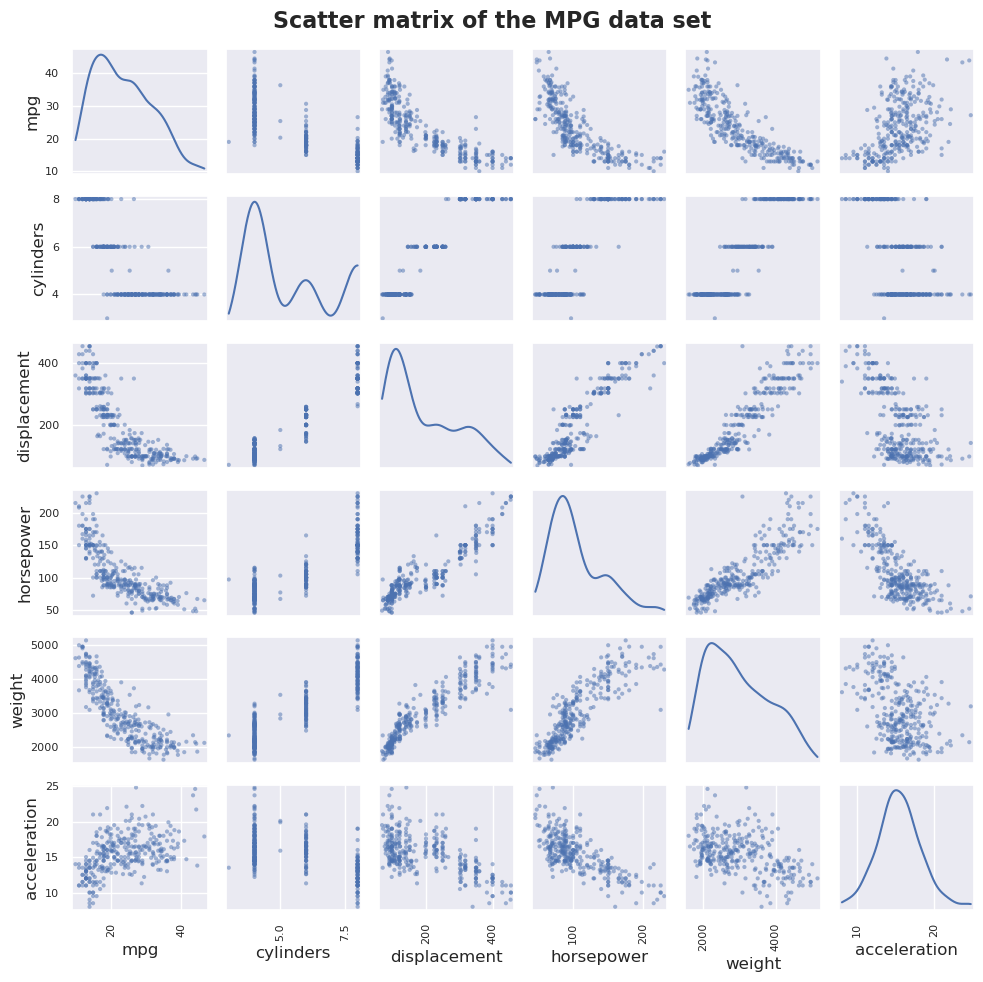

In [9]:
pd.plotting.scatter_matrix(df_mpg_train[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']],
                           diagonal='kde', figsize=(10, 10))
plt.suptitle('Scatter matrix of the MPG data set', size=16, weight='bold')
plt.tight_layout();     # this makes the subplots fit nicer in the figure

### Wheat Seeds Data Set

The **wheat seeds** data set contains six geometrical measurements of 210 different seeds. Here is a summary of the columns:

|Column  | Type | Description | 
|:-------|:----|:----|
|area| continuous|area of the kernel in mm $\hspace{-0.1cm}{}^2$|
|perimeter| continuous|perimeter of the kernel in mm|
|kernel_length| continuous|length of the kernel in mm|
|kernel_width| continuous|width of the kernel in mm|
|asymmetry| continuous|asymmetry coefficient |
|groove_length| continuous|length of the groove in the kernel in mm|

We load the data into the data frame `df_seeds`.

In [10]:
df_seeds = pd.read_csv('datasets/seeds.csv')
df_seeds.head()

,area,perimeter,kernel_length,kernel_width,asymmetry,groove_length
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175


# 1. Linear Regression

The goal of _linear regression_ is to come up with a _linear model_ that best fits the data.
It is a _supervised learning_ method
that seeks to "explain" the dependent variable based on the independent variables
using a _linear model_.

> **Note**:
> The term _variable_ means something else in statistics than in programming.
> A (statistical) variable is any characteristic,
> number, or quantity that can be measured or counted.
> Its value can vary from individual to individual in the population.
>
> In statistics, we distinguish _dependent_ variables (also referred to as output or response variables) and
> _independent_ variables (also referred to as input or explanatory variables).
> The values of the _dependent_ variables are considered to be influenced by the
> values of the _independent_ variables.

In this lesson,
we will use the **Ordinary Least Squares** (OLS) algorithm for linear regression. If you are interested in more details,
then you can consult the SciKit Learn documentation:

* [Ordinary Least Squares algorithm](http://scikit-learn.org/stable/modules/linear_model.html)
* [The `sklearn.linear_model.LinearRegression` object](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In the case of our example data set,
we see a tendency that larger values of `a` correspond to larger values of `b`
and vice versa. Can we quantify this relationship?

### Step 1. Select the Data

We first need to identify in the data the dependent variable and the independent variables.

In this example, we (fairly arbitrarily) _choose_ `a` to be the _independent_ variable
and `b` the _dependent_ variable. In real-life applications, it is often more obvious how to make that distinction.

We select the data for training and testing the linear regression model as follows.

In [11]:
X_reg_train = df_example_train[['a']].copy()  # independent variable; just one column in this case
y_reg_train = df_example_train[['b']].copy()  # dependent variable; just one column

X_reg_test = df_example_test[['a']].copy()  # independent variable; just one column in this case
y_reg_test = df_example_test[['b']].copy()  # dependent variable; just one column

> **Notes:** 
> - It is good practice to copy the data (as we have done above). That way, when you start to play around with the selected data (e.g., to add new independent variables), you will not accidentally modify the original data.
> - `X_reg_train` and  `y_reg_train` should be data frames, even if they contain only one column (therefore we use double square brackets in `df_example[['a']]`).
> - In case of **multiple independent variables**, the `X_reg_train` data frame will contain several columns, one for each variable (e.g. `X_reg_train = df[['a', 'b', 'c']]`). This explains the capitalization of the `X`, which indicates that, in general, it refers to a matrix (2-dimensional). The lowercase `y` indicates that it refers to a vector (1-dimensional).

### Step 2. Create the Regression Object

Next, we create the _regression object_ for **linear regression**
and store it in the variable `reg`.

In [12]:
reg = LinearRegression()

### Step 3. Fit the Model

To fit a linear model to the data, we invoke the **`fit(X, y)`** method of the regression object, with `X` being the training data for the independent variables and `y` being the training data for the dependent variables:

In [13]:
# Only pass values without headers to avoid UserWarning
reg.fit(X_reg_train.values, y_reg_train)

LinearRegression()

The regression object `reg` is now fitted to the given data, modeling the values in `y_reg_train` in terms of the values in `X_reg_train`.

### Step 4. Extract Model Parameters

The regression object stores the model parameters that it fitted in the previous step. These parameters can be accessed via attributes of the regression object:

* **`reg.intercept_`**: a list containing a single *intercept*, that is, the constant term (additive offset);
* **`reg.coef_`**: a list of *coefficients*, one for each of the independent variables.

Recall that a linear model with $m$ independent variables can be written as:

$y = \beta_0 + \sum_{i = 1}^m \beta_i x_i$

where $\beta_0$ and $\beta_i$ are the fitted parameters, $y$ is the dependent variable and $x_i$ are the independent variables. The single element in `reg.intercept_` corresponds to the $\beta_0$ parameter, and the elements in `reg.coef_` correspond to the parameters $\beta_i$ for $1 \leq i \leq m$.

For our example data, we get the following coefficient and intercept:

In [14]:
reg.intercept_, reg.coef_

(array([0.60243056]), array([[0.96354167]]))

which means that $\beta_0 = 0.60243056$ and $\beta_1 = 0.96354167$.

### Step 5. Visualize the Model

In the case of a linear model where we have one independent variable and one dependent variable,
we can visualize that model as a _line_ in the scatter plot.

For higher-dimensional linear models (with multiple independent variables), such a visualization is more complex and outside the scope of this lesson.

Visualizing this line could be done based on the extracted _coefficient_ and _intercept_. However, for the specific case of a single independent variable and a single dependent variable,
Seaborn offers the function **`regplot()`** that produces a **scatter plot with a regression line**.

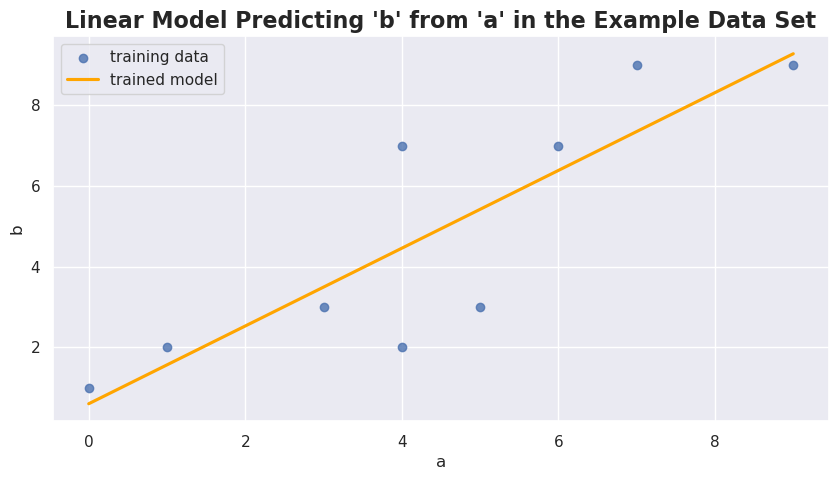

In [15]:
ax = sns.regplot(x=X_reg_train['a'], y=y_reg_train['b'], line_kws={'color': 'orange'}, ci=None)
ax.legend(['training data', 'trained model'])
ax.set_title("Linear Model Predicting 'b' from 'a' in the Example Data Set", weight='bold', size=16);

By providing the argument `line_kws={'color': 'orange'}`, we set the color of the line to orange.

We also provided the argument `ci = None`, to indicate that Seaborn should not draw a confidence interval (confidence intervals will be covered later in the course). 

> **Note:** `sns.regplot()` does not use the regression object. Rather, Seaborn recomputes the parameters for the linear regression from the data using the same OLS algorithm.

### Step 6. Make Predictions

Once you have fitted a model to the training data set, you can use it to predict the dependent values for given independent values, also outside the training set. For that purpose, the regression object provides a function **`predict()`**.

Let us use it in our example to predict the outcomes for all given `a` values.
We store the predictions in a new column labeled `'b_predicted'`.

In [16]:
# Pass values without headers to avoid UserWarning
df_example['b_predicted'] = reg.predict(df_example[['a']].values) 
df_example[['b', 'b_predicted']]

,b,b_predicted
0,1,0.602431
1,2,1.565972
2,1,2.529514
3,3,3.493056
4,2,4.456597
5,3,5.420139
6,7,4.456597
7,8,5.420139
8,7,6.383681
9,9,7.347222


> **Note**:
> `reg.predict()` requires a two-dimensional structure as an argument,
> such as a `DataFrame`, and it also returns a two-dimensional result.

If you want a prediction for a single independent value, then you need to _wrap_ that value in a `DataFrame`, as done below.

In [17]:
reg.predict(pd.DataFrame([4.5]))

array([[4.93836806]])

To obtain the prediction as a single value,
you can extract it from the result by *indexing*.

In [18]:
reg.predict(pd.DataFrame([4.5]))[0, 0]

np.float64(4.938368055555555)

### Step 7. Assess the Model's Quality

There are various ways to assess the quality of a trained model.

#### Step 7a. Goodness of Fit

One way is to look at how well the model fits the **training set**. A common metric for the *goodness of fit* is $R^2$, also known as the _coefficient of determination_.
$R^2$ typically takes values between 0 and 1, with 1 indicating a perfect fit and 0 indicating a fit that is as good as the horizontal line through the mean value of the dependent variable. Note that $R^2$ can also take on negative values, when the model is a poorer fit than the horizontal line through the mean.

$R^2$ can be computed as follows:

In [19]:
# Pass values without headers to avoid UserWarning
reg.score(X_reg_train.values, y_reg_train)

0.7285635217983651

> **Note:** If you add more independent variables to the selected data,
the value of $R^2$ stays the same or goes up (it never goes down).

Another way to evaluate the goodness of fit is to use a **residual plot**, plotting the *residuals*. Residuals are computed by taking the difference between the true value and the predicted value for the dependent variable:

In [20]:
# Pass values without headers to avoid UserWarning
residuals = y_reg_train - reg.predict(X_reg_train.values)
residuals

,b
5,-2.420139
0,0.397569
1,0.434028
11,-0.274306
8,0.616319
3,-0.493056
6,2.543403
9,1.652778
4,-2.456597


We can plot the residuals on the $y$-axis against an independent variable on the $x$-axis, to see if the model fits the independent variable well. A good fit is indicated by dots that are distributed randomly relative to the horizontal zero line:

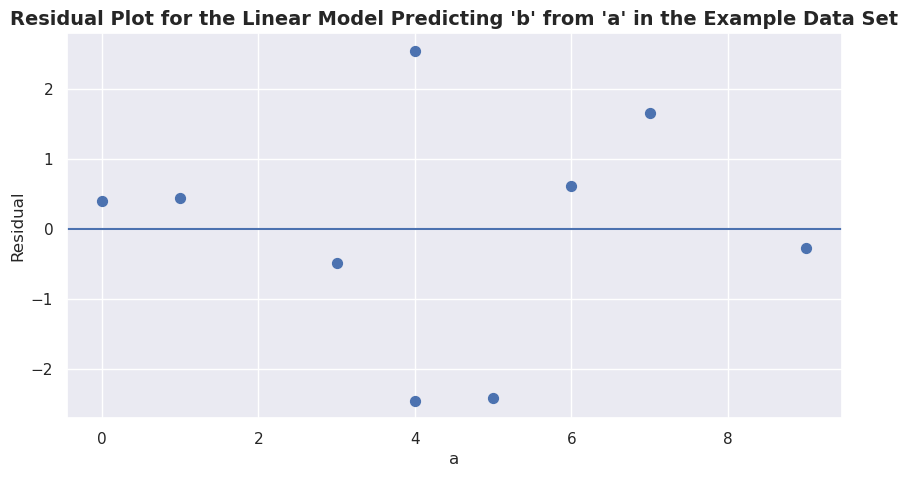

In [21]:
plt.scatter(x=X_reg_train['a'], y=residuals, s=50)
plt.axhline()
plt.title("Residual Plot for the Linear Model Predicting 'b' from 'a' in the Example Data Set", weight='bold', size=14)
plt.xlabel('a')
plt.ylabel('Residual');

A structure in the residuals (e.g. a V-shape or a trend) would indicate that the dependent variable contains information about the independent variable that is not included in the model.

#### Step 7b. Predictive Performance

We are often interested in how well a trained model generalizes, i.e. how well it will perform on data *outside of the training set*. We can try to measure how well a model generalizes by computing different metrics on a held-out **test set**. One such metric is the *mean absolute error*, which is the average absolute difference between the *true* value and the *predicted* value. It can be computed using SciKit Learn function `mean_absolute_error()`:

In [22]:
# Pass values without headers to avoid UserWarning
mean_absolute_error(y_reg_test, reg.predict(X_reg_test.values))

np.float64(1.4733796296296298)

where `y_reg_test` are the true values and `reg.predict(X_reg_test.values)` are the predicted values. This indicates that on average we can expect the predictions of the model to be off by approximately 1.47.

## Exercises on Linear Regression

Now it is time to apply linear regression to the Auto MPG data set.

### Exercise 1.a: Fit a Linear Model for `mpg`

Fit a linear regression model for predicting the fuel efficiency of cars using the *training data set* `df_mpg_train`, with `'mpg'` as the _dependent variable_ and
`'weight'` as the _independent variable_. Perform the following steps:

**Step 1. Select the data**

* Assign the training data for the independent variable to `X_mpg_train` as a data frame.
* Assign the training data for the dependent variable to `y_mpg_train` as a data frame.
* Assign the test data for the independent variable to `X_mpg_test` as a data frame.
* Assign the test data for the dependent variable to `y_mpg_test` as a data frame.

**Step 2. Create the regression object**

* Assign the regression object to `reg_mpg`.

**Step 3. Fit the regression model**

**Step 4. Extract the regression parameters**

* Assign the **single** coefficient to `coef_mpg` as a **float**.
* Assign the intercept to `intercept_mpg` as a **float**.

In [23]:
#// BEGIN_TODO [DMM_1a] Linear regression (4 points)

df_mpg_train, df_mpg_test = train_test_split(df_mpg, test_size=0.2, random_state=7)

y_mpg_train = df_mpg_train[['mpg']].copy()
y_mpg_test = df_mpg_test[['mpg']].copy()

X_mpg_train = df_mpg_train[['weight']].copy()
X_mpg_test = df_mpg_test[['weight']].copy()

reg_mpg = LinearRegression()
reg_mpg.fit(X_mpg_train, y_mpg_train)

coef_mpg = reg_mpg.coef_[0,0]
intercept_mpg = reg_mpg.intercept_[0]

#// END_TODO [DMM_1a]

coef_mpg, intercept_mpg

(np.float64(-0.007832471902572252), np.float64(46.9510444176954))

### Exercise 1.b: Visualize the Model

Create a scatter plot with a regression line for the linear model.  

> **Hint:** Use `sns.regplot()`.

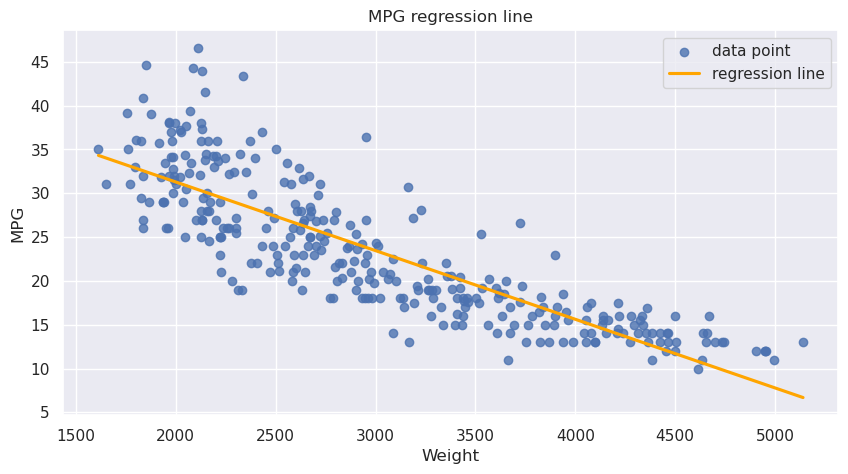

In [142]:
#// BEGIN_TODO [DMM_1b] Scatter plot with regression line (2 points)

ax = sns.regplot(x=X_mpg_train, y=y_mpg_train, line_kws={'color': 'orange'}, ci=False)
ax.legend(['data point', 'regression line'])
ax.set_ylabel('MPG')
ax.set_xlabel('Weight')
ax.set_title('MPG regression line');

#// END_TODO [DMM_1b]

### Exercise 1.c: Interpret the Model

Does the fitted model suggest that a _higher_ weight corresponds to a _higher_ number of miles per gallon? Assign your (boolean) answer to `higher_weight_higher_mpg`.

In [25]:
#// BEGIN_TODO [DMM_1c] Linear regression (1 point)

higher_weight_higher_mpg = False

#// END_TODO [DMM_1c]

higher_weight_higher_mpg

False

### Exercise 1.d: Assess the Goodness of Fit

How well does the model fit the training data, i.e. what is the coefficient of determination $R^2$?
Assign your (numeric) answer to `R2_mpg`.

In [26]:
#// BEGIN_TODO [DMM_1d] R squared (2 points)

R2_mpg = reg_mpg.score(X_mpg_train, y_mpg_train)

#// END_TODO [DMM_1d]

R2_mpg

0.7080014802279737

### Residual Plot

We can use a residual plot to see if there is any structure in the residuals, indicating that the training data can be modeled more accurately with a different model.

/usr/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


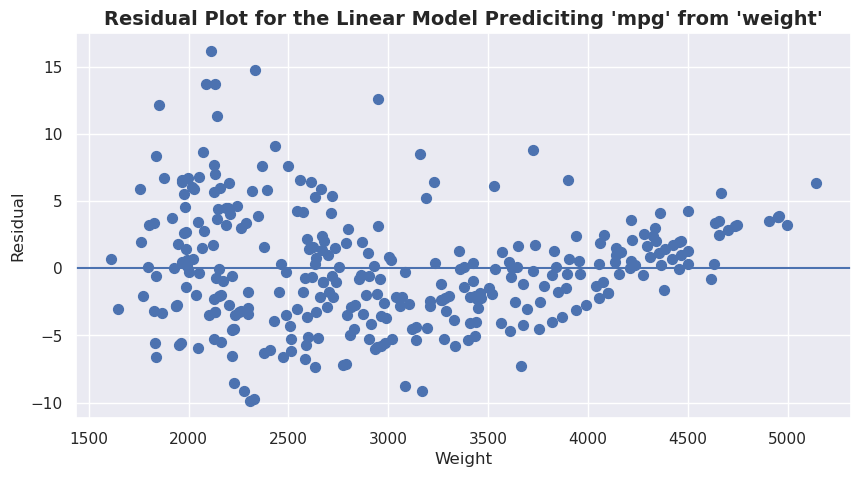

In [27]:
plt.scatter(x=X_mpg_train['weight'], y=(y_mpg_train - reg_mpg.predict(X_mpg_train.values)), s=50)
plt.axhline()
plt.title("Residual Plot for the Linear Model Prediciting 'mpg' from 'weight'", weight='bold', size=14)
plt.xlabel('Weight')
plt.ylabel('Residual');

We can see that the residuals are not distributed randomly relative to the zero line (e.g. the variance of the residuals increases for lower `'weight'` values), suggesting that a more complex model in terms of `'weight'` may result in a better fit.

### Exercise 1.e: Fit a Linear Model with a Quadratic Term

When we look at the initial plot of `mpg` versus `weight`,
it does not look linear, but curved.
This suggests including higher-order terms,
such as the square of `weight`. In this exercise, we will try to find coefficients $a$, $b$ and $c$ such that

  `mpg` $\approx a$ `weight`$^2$ + $b$ `weight` + $c$

To this end, create a new data frame named `X_mpg_qt_train` containing the `'weight'` column of `df_mpg_train`. Then add a column `'weight^2'` containing the squared weight values.

Next, fit a linear regression model with `mpg` as the dependent variable,
and both `weight` and `weight^2` as independent variables.

Assign

* the data for the independent variable (a data frame with the `'weight'` and `'weight^2'` columns) to `X_mpg_qt_train`,
* the regression object to `reg_mpg_qt`,
* the coefficients to `coef_mpg_qt` (as an **array**),
* the intercept to `intercept_mpg_qt` (as a **float**), and
* $R^2$ (for the training set `X_mpg_qt_train`) to `R2_mpg_qt`.

> **Hint:** You can reuse `y_mpg_train` created earlier as the dependent variable for fitting the model.

In [28]:
#// BEGIN_TODO [DMM_1e] Model with quadratic term explaining mpg from weight (5 points)

X_mpg_qt_train = df_mpg_train[['weight']].copy()
X_mpg_qt_train['weight^2'] = X_mpg_qt_train['weight']**2

reg_mpg_qt = LinearRegression()
reg_mpg_qt.fit(X_mpg_qt_train[['weight', 'weight^2']], df_mpg_train['mpg'])

coef_mpg_qt = reg_mpg_qt.coef_
intercept_mpg_qt = reg_mpg_qt.intercept_
R2_mpg_qt = reg_mpg_qt.score(X_mpg_qt_train[['weight', 'weight^2']], y_mpg_train)

#// END_TODO [DMM_1e]

coef_mpg_qt, intercept_mpg_qt, R2_mpg_qt

(array([-2.03771397e-02,  1.95324882e-06]),
 np.float64(65.55748332549413),
 0.7383397890274057)

### Exercise 1.f: Extract Model Parameters

From the linear regression, we can extract coefficients $a$, $b$ and $c$ such that

`mpg` $\approx a$ `weight`${}^2$ + $b$ `weight` + $c$

Assign the values of $a$, $b$, and $c$ to the Python variables `a`, `b`, and `c`. Use the equation to compute the predicted `mpg` when `weight` equals $4000$ lbs, and assign the result to `y_mpg_4000`.

<span class="t">Hint<span class="c">:</span></span>
<span class="h">
The coefficients are in the same order as the columns of the fitted data frame with independent variables, in this case `X_mpg_qt_train`.
</span>

In [115]:
#// BEGIN_TODO [DMM_1f] Extract model parameters for the quadratic model (2 points)

b, a = coef_mpg_qt
c = intercept_mpg_qt
y_mpg_4000 = a*(4000**2) + b*4000 + c

#// END_TODO [DMM_1f]

a, b, c, y_mpg_4000

(np.float64(1.953248819643505e-06),
 np.float64(-0.02037713966197384),
 np.float64(65.55748332549413),
 np.float64(15.300905791894856))

### Exercise 1.g: Visualize the Model with a Quadratic Term

Create a scatter plot with a regression line for this quadratic model (use `sns.regplot()` with argument `order=2` for a linear model with a quadratic term). Add the test data to the plot in a different color.

> **Hint:** Use `X_mpg_train` as the independent variable. Revisit superimposing plots in the VIS exercises for adding the test data.

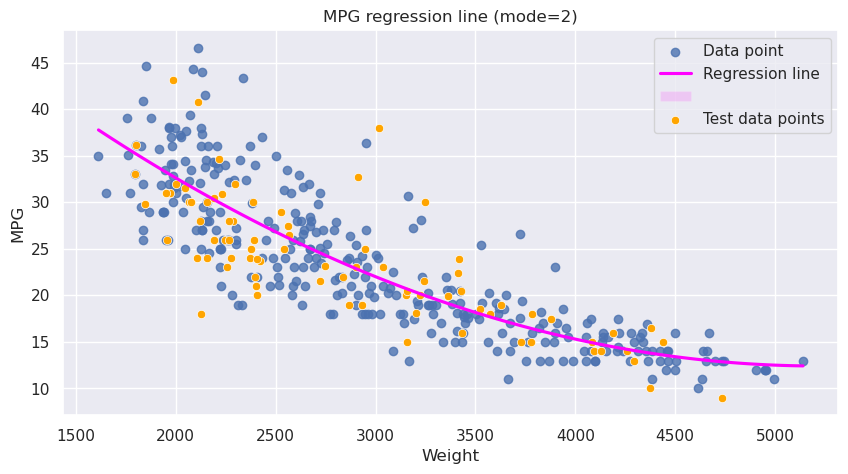

In [217]:
#// BEGIN_TODO [DMM_1g] Scatter plot and quadratic model (2 points)

ax = sns.regplot(x=X_mpg_train, y=y_mpg_train, order=2, line_kws={'color': 'magenta'}, ci=False)
sns.scatterplot(x=X_mpg_test.values.flatten(), y=y_mpg_test.values.flatten(), c='orange', ax=ax)

ax.legend(['Data points', 'Regression line', '', 'Test data points'])
ax.set_xlabel('Weight')
ax.set_ylabel('MPG')
ax.set_title('MPG regression line (mode=2)');

#// END_TODO [DMM_1g]

### Exercise 1.h: Did the Goodness of Fit Improve?

Is the value of $R^2$ for new model better than in [Exercise 1.d](#Exercise-1.d)? Assign your boolean answer to `R2_improved_for_qt`.

In [121]:
#// BEGIN_TODO [DMM_1h] Is this better than the linear model from 1.a? (1 point)

# 0.7080014802279737 OLD
# 0.7383397890274057 NEW
R2_improved_for_qt = True

#// END_TODO [DMM_1h]

R2_improved_for_qt

True

> **Warning**: In fact, if you add more independent variables, the value of $R^2$ will **always** increase. 
> This does not necessarily mean that the model gets better. If you add too many variables, the model will **overfit**: although predictions for seen (training) data are good, predictions on new (test) data will be poor.
>
> Below is an example of fitting a high-order polynomial. It is a plot of a linear regression model explaining `mpg` from `weight` of order 100. Note that the predictions of `mpg` for previously unseen weights (e.g. between 4500 and 5500 lbs) will be poor.
>
> 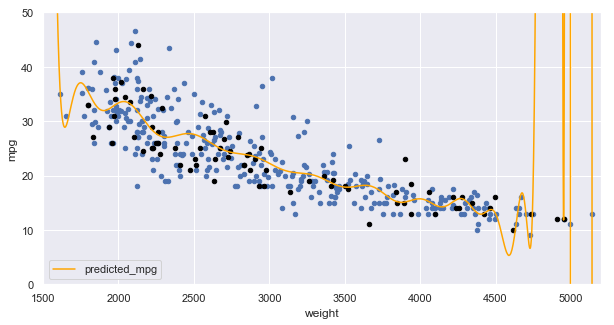

### Exercise 1.i: Make Predictions

Predict the fuel efficiency (in mpg) of the cars in the test set.
To this end, create a new data frame `X_mpg_qt_test` containing the `'weight'` column of `df_mpg_test`. Then add a column `'weight^2'` containing the squared weight values.

Assign your answer as a new column labeled `'predicted_mpg'` to the data frame `df_mpg_test`. 

> **Hint:** Use `reg_mpg_qt.predict()`.

In [32]:
#// BEGIN_TODO [DMM_1i] Predict fuel efficiency (2 points)

X_mpg_qt_test = df_mpg_test[['weight']].copy()
X_mpg_qt_test['weight^2'] = X_mpg_qt_test['weight']**2

df_mpg_test['predicted_mpg'] = reg_mpg_qt.predict(X_mpg_qt_test[['weight', 'weight^2']])

#// END_TODO [DMM_1i]

df_mpg_test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,predicted_mpg
148,26.0,4,116.0,75.0,2246.0,14.0,74,European,fiat 124 tc,29.643623
389,22.0,6,232.0,112.0,2835.0,14.7,82,American,ford granada l,23.486993
350,34.7,4,105.0,63.0,2215.0,14.9,81,American,plymouth horizon 4,30.005197
52,30.0,4,88.0,76.0,2065.0,14.5,71,European,fiat 124b,31.807782
332,29.8,4,89.0,62.0,1845.0,15.3,80,European,vokswagen rabbit,34.610568


### Exercise 1.j: Assess the Predictive Performance

Let us see how good the predictions really are. Evaluate the mean absolute error on the **_test set_** and assign its value to the variable `MAE_mpg_qt`. 

> **Hint:** You can reuse `y_mpg_test` for the true values.

In [33]:
#// BEGIN_TODO [DMM_1j] Prediction accuracy (1 point)

MAE_mpg_qt = mean_absolute_error(y_mpg_test, df_mpg_test['predicted_mpg'])

#// END_TODO [DMM_1j]

MAE_mpg_qt

np.float64(3.2270275167794367)

# 2. Decision Tree Mining

The goal of _decision tree mining_ is to come up with a _decision tree_ that best fits the data. It is a _supervised learning_ method that seeks to predict a dependent variable from independent variables, where

* each decision is based on the value of one variable, and
* the tree has minimal depth
  (each decision is most informative).

In this lesson, we will use (an optimized version of) the **CART** algorithm
for decision tree mining. It can be started with a bound on the tree depth.

> **Note**: the decision tree implementation in sklearn is non-deterministic, i.e. it contains a random component. Consequently, the fitted model may differ each time you call the fitting function. You can see it by executing multiple times the cells with the code fitting the tree and extracting the model parameters.

If you are interested in more details, you can consult the documentation at SciKit Learn:

* [Decision Trees](http://scikit-learn.org/stable/modules/tree.html)
* [The `sklearn.tree.DecisionTreeClassifier` decision-tree object](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Step 1. Select the Data

We illustrate how to train a decision tree classifier, by using the data frame `df_example`. The following scatter plot visualizes the training set, using the dependent variable `'c'` to color the dots.

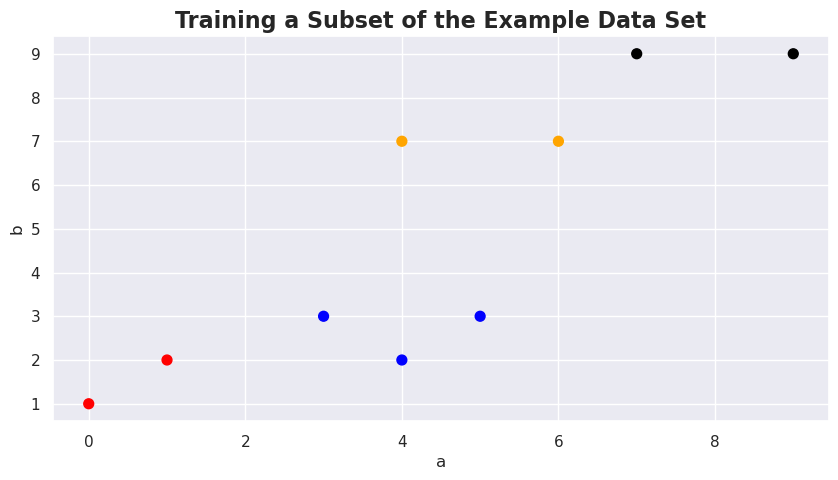

In [34]:
ax = df_example_train.plot(kind='scatter', x='a', y='b', s=50, c=df_example_train['c'])
ax.set_title('Training a Subset of the Example Data Set', weight='bold', size=16);

We choose `'a'` and `'b'` to be the *independent* variables and `'c'` to be the *dependent* variable:.

In [35]:
X_dtc_train = df_example_train[['a', 'b']].copy()
y_dtc_train = df_example_train[['c']].copy()

X_dtc_test = df_example_test[['a', 'b']].copy()
y_dtc_test = df_example_test[['c']].copy()

Note that again we store that the dependent variable data in a data frame by using double square brackets. A series would also work as an alternative.

### Step 2. Create the Decision-tree Classifier

Next, we create the _decision-tree object_ for **decision tree mining**
and store it in the variable `dtc`.
We supply an upper bound on the tree depth as an argument.

In [36]:
dtc = DecisionTreeClassifier(max_depth=3)

If you do not supply an upper bound,
then the decision tree will grow as far as is "necessary" to get the best result.

A larger tree is not necessarily better. Large trees may **overfit**: produce good results on training data but poor results on test data.

### Step 3. Do the Fitting

Invoke the **`fit()`** function of the decision-tree object,
supplying the selected data/

In [37]:
dtc.fit(X_dtc_train, y_dtc_train)

DecisionTreeClassifier(max_depth=3)

### Step 4. Extract Model Parameters

In the case of decision tree mining,
the relevant attributes of the decision-tree classifier `dtc` are:

* **`dtc.tree_`**: the _mined decision tree_.
  * **`dtc.tree_.node_count`**: the _number of nodes_ in the tree.
  * **`dtc.tree_.max_depth`**: the _depth_ of the tree, that is, the maximum distance from the root to any leaf.
* **`dtc.feature_importances_`**: the _relative importance_ of each independent variable.
* **`dtc.classes_`**: the _inferred dependent values_ for the dependent variable(s)  .

It is convenient

* to visualize the tree (see Step 5), and
* to convert the feature importances to a data frame
    with the same column labels as the original data.

In [38]:
dtc.tree_.node_count, dtc.tree_.max_depth

(7, 2)

In [39]:
feature_importances = pd.DataFrame([dtc.feature_importances_], columns=X_dtc_train.columns)
feature_importances

,a,b
0,0.36,0.64


In [40]:
dtc.classes_

array(['black', 'blue', 'orange', 'red'], dtype=object)

### Step 5. Visualize the Model

Unfortunately,
creating a _graphical representation_ of a decision tree
(as shown in the image below) is [outside the scope of these lessons](http://scikit-learn.org/stable/modules/tree.html).

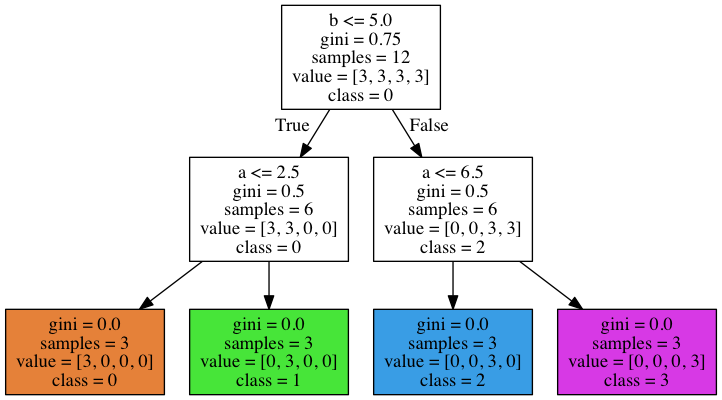

Instead, we use a (third-party) function **`tree_print()`**,
which is imported from `treeviz.py`
to show a _textual representation_.

In [41]:
tree_print(dtc, X_dtc_train)
# tree.plot_tree(dtc);

if b =< 5.0: 
  |then if a =< 2.0: 
  |  |then red
  |  |else blue
  |else if b =< 8.0: 
  |  |then orange
  |  |else black
<---->
Tree Depth:  2


Recall that we set `max_depth=3` when creating the decision-tree object.
Apparently, the dependent value can be predicted fully with a smaller tree,
since the mined decision tree has a depth of just 2.

### Step 6. Make Predictions

Once you have fitted a model to the training data set, you can use it to predict the dependent values for given independent values, also outside the training set. For that purpose, the regression object provides a function **`predict()`**.

Let us use it in our example to predict the outcomes for `a` and `b` values in the training set:

In [42]:
y_dtc_pred = dtc.predict(X_dtc_train)
y_dtc_pred

array(['blue', 'red', 'red', 'black', 'orange', 'blue', 'orange', 'black',
       'blue'], dtype=object)

Note that this produces an array.
We can compare these predictions to the real values in the training set.

In [43]:
pd.DataFrame({'real': y_dtc_train['c'], 'predicted': y_dtc_pred})

,real,predicted
5,blue,blue
0,red,red
1,red,red
11,black,black
8,orange,orange
3,blue,blue
6,orange,orange
9,black,black
4,blue,blue


### Step 7. Assess the Model's Quality

The quality of a decision tree can be expressed as its *accuracy*.

#### Step 7a. Goodness of Fit

One way is to look at how well the model fits the training set. The *goodness of fit* of a classification model, e.g. a decision tree, can be measured by computing the accuracy on the **training set** as follows.

In [44]:
dtc.score(X_dtc_train, y_dtc_train)

1.0

This score is at best 1.0 (100% correct)
and will drop towards 0.0 with less accuracy.

> **Note:** _Accuracy_ treats all errors in the same way.
When not all types of errors have the same impact
(think of _false positives_ versus *false negatives*),
accuracy is not a good measure.

To get an idea of types of errors in the model predictions, we can create a **confusion matrix** using the `confusion_matrix` function from `sklearn`. As there are four categories in this example (`'black'`, `'blue'`, `'orange'` and `'red'`), this matrix will be $4 \times 4$.

In [45]:
confusion_matrix(y_dtc_train, y_dtc_pred)
# Actual vs predicted
# Diogonal: TP(True positives)

array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

For a visualization of this matrix that includes the label of each row/column, we can use `ConfusionMatrixDisplay.from_prediction` as follows.
Here we use `plt.grid()` to turn off the grid, as it obfuscates this type of plot.

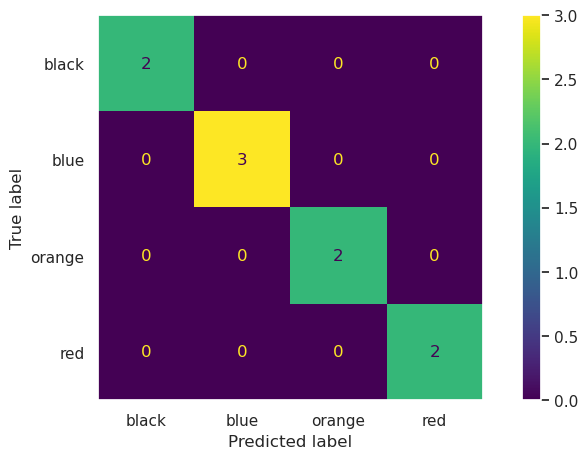

In [46]:
ConfusionMatrixDisplay.from_predictions(y_dtc_train, y_dtc_pred)
plt.grid();

Because the accuracy score is 1.0 (maximal), it is no surprise that only the diagonal of this matrix has nonzero entries.

#### Step 7b. Predictive Performance

We are often interested in how well a trained model generalizes, i.e. how well it will perform on data *outside of the training set*. We can try to measure how well a model generalizes by computing the accuracy on the **test set**.

In [47]:
dtc.score(X_dtc_test, y_dtc_test)

0.6666666666666666

Because of the aforementioned randomness in the fitting algorithm of a decision tree, this accuracy will be either 0.66... or 1.0 in the cell above. 
As the test set only contains 3 data points, this means that the tree correctly predicts either 2 or 3 `c`-values out of 3.

## Exercises on Decision Trees

Let us see if we can learn a decision tree to predict the origin of the cars in the Auto MPG data set.

### Exercise 2.a: Fit a Decision Tree for `'origin'`

Fit a decision tree with a **maximum depth of $3$** using the *training data set*, with `'origin'` as _dependent variable_ and the features
`'mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year'`
as _independent variables_. Perform the following steps:

**Step 1. Select the data**

* Assign the following list of column labels to `features`: `'mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year'`.
* Using `df_mpg_train` and `df_mpg_test`:
    * Assign the *training data* for the independent variable to a data frame `X_mpg_dtc_train`.
    * Assign the *training data* for the dependent variable to a data frame `y_mpg_dtc_train`.
    * Assign the *test data* for the independent variable to a data frame `X_mpg_dtc_test`.
    * Assign the *test data* for the dependent variable to a data frame `y_mpg_dtc_test`.

**Step 2. Create the decision-tree object**

* Assign the decision tree classifier to `dtc_depth_3`.

**Step 3. Fit the model**

**Step 4. Extract model parameters**

* Create a data frame `feature_importances_depth_3` with the _relative importance_ of the feature.

In [123]:
#// BEGIN_TODO [DMM_2a] Decision tree (4 points)

X_mpg_dtc_train = df_mpg_train[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']]
X_mpg_dtc_test = df_mpg_test[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']]

y_mpg_dtc_train = df_mpg_train[['origin']]
y_mpg_dtc_test = df_mpg_test[['origin']]

dtc_depth_3 = DecisionTreeClassifier(max_depth=3)
dtc_depth_3.fit(X_mpg_dtc_train, y_mpg_dtc_train)

feature_importances_depth_3 = pd.DataFrame(dtc_depth_3.feature_importances_)
features = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year']
feature_importances_depth_3['features'] = features

#// END_TODO [DMM_2a]

feature_importances_depth_3

,0,features
0,0.000000,mpg
1,0.000000,cylinders
2,0.843791,displacement
3,0.116268,weight
4,0.039941,acceleration
5,0.000000,year


### Exercise 2.b: Assess the Goodness of Fit & Types of errors

Assess the goodness fit of the decision tree by computing the accuracy on the training set. Assign your answer to the variable `acc_depth_3_train`.  
Next, use the model to predict the `'origin'` of each car in the training set, and store the result in `df_mpg_train` as a column called `predicted_origin`.  
Finally, use this column in combination with `y_mpg_dtc_train` to create a confusion matrix of the training set predictions.


In [49]:
#// BEGIN_TODO [DMM_2b] Training set accuracy for a decision tree of depth <= 3 & Confusion matrix (2 points)

acc_depth_3_train = dtc_depth_3.score(X_mpg_dtc_train, y_mpg_dtc_train)

df_mpg_train['predicted_origin'] = dtc_depth_3.predict(X_mpg_dtc_train)
confusion_matrix(y_mpg_dtc_train, df_mpg_train['predicted_origin'])

#// END_TODO [DMM_2b]

acc_depth_3_train

0.8050314465408805

In [50]:
df_mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,predicted_origin
338,27.2,4,135.0,84.0,2490.0,15.7,81,American,plymouth reliant,American
173,24.0,4,119.0,97.0,2545.0,17.0,75,Japanese,datsun 710,European
331,33.8,4,97.0,67.0,2145.0,18.0,80,Japanese,subaru dl,Japanese
53,31.0,4,71.0,65.0,1773.0,19.0,71,Japanese,toyota corolla 1200,Japanese
351,34.4,4,98.0,65.0,2045.0,16.2,81,American,ford escort 4w,American


### Exercise 2.c: Visualize the Model

Show a textual representation of the decision tree.

In [51]:
#// BEGIN_TODO [DMM_2c] Textual representation of decision tree (1 point)

tree_print(dtc_depth_3, X_mpg_dtc_train)

#// END_TODO [DMM_2c]

if displacement =< 134.5: 
  |then if displacement =< 97.25: 
  |  |then if acceleration =< 19.449999809265137: 
  |  |  |then Japanese
  |  |  |else European
  |  |else if displacement =< 99.0: 
  |  |  |then American
  |  |  |else European
  |else if displacement =< 190.5: 
  |  |then if weight =< 3071.5: 
  |  |  |then American
  |  |  |else European
  |  |else American
<------->
Tree Depth:  3


### Exercise 2.d: Assess the Predictive Performance

The obtained decision tree gives us a simple scheme to predict the origin of cars based on their features. Let us see how good these predictions are for the cars in the test set: assess the quality of the decision tree by computing its accuracy for the _test set_. Assign your answer to the variable `acc_depth_3_test`.

In [52]:
#// BEGIN_TODO [DMM_2d] Test set accuracy for a decision tree of depth <= 3 (1 point)

acc_depth_3_test = dtc_depth_3.score(X_mpg_dtc_test, y_mpg_dtc_test)

#// END_TODO [DMM_2d]

acc_depth_3_test

0.7625

# 3. Clustering

The goal of _clustering_ is to come up with a _collection of clusters_ that best fits the data.
It is an _unsupervised learning_ method
that seeks to group the data points in coherent groups, where

* distances _within_ (intra) groups are relatively *small*, and
* distances _between_ (inter) groups are relatively _large_.

In this lesson, we will use the **K-Means** algorithm for clustering.
It is non-deterministic and must be started with the desired number of clusters.

If you are interested in more details, you can consult the documentation at SciKit Learn:

* [K-Means algorithm](http://scikit-learn.org/stable/modules/clustering.html#k-means)
* [The `sklearn.cluster.KMeans` cluster object](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Step 1. Select the Data

We select the `'a'` and `'b'` columns from `df_example`:

In [53]:
X_km = df_example[['a', 'b']].copy()

### Step 2. Create the Cluster Object

Next, we create the _cluster object_ for **K-Means clustering**,
supplying the desired number of clusters as an argument (**`n_clusters=...`**),
and store it in the variable `km`.

In this example, we go for four clusters.

In [54]:
km = KMeans(n_clusters=4)

### Step 3. Fit the Model

Invoke the **`fit()`** function of the cluster object,
supplying the selected data.

In [55]:
km.fit(X_km.values)

KMeans(n_clusters=4)

### Step 4. Extract Model Parameters

In the case of K-Means clustering,
the relevant attributes of the cluster object `km` are:

* **`km.cluster_centers_ `**: the _locations of the cluster centers_.
* **`km.labels_`**: the _cluster labels_ for the data points (labels are in the range from $0$ through $k-1$, where $k = $ `n_clusters`).

It is convenient

* to convert the cluster centers to a data frame with the same column labels as the original data,
    and
* to add the labels as a new column to the data being clustered.

In our example, we do this as follows.

In [56]:
centers = pd.DataFrame(km.cluster_centers_, columns=X_km.columns)
centers

,a,b
0,4.0,2.666667
1,8.0,8.666667
2,5.0,7.333333
3,1.0,1.333333


In [57]:
X_km['cluster'] = km.labels_
X_km

,a,b,cluster
0,0,1,3
1,1,2,3
2,2,1,3
3,3,3,0
4,4,2,0
5,5,3,0
6,4,7,2
7,5,8,2
8,6,7,2
9,7,9,1


### Step 5. Visualize the Model

To visualize the clusters,
we create a scatter plot,
where we color each data point according to its cluster.

Finally, we add the cluster centers marked by a cross.

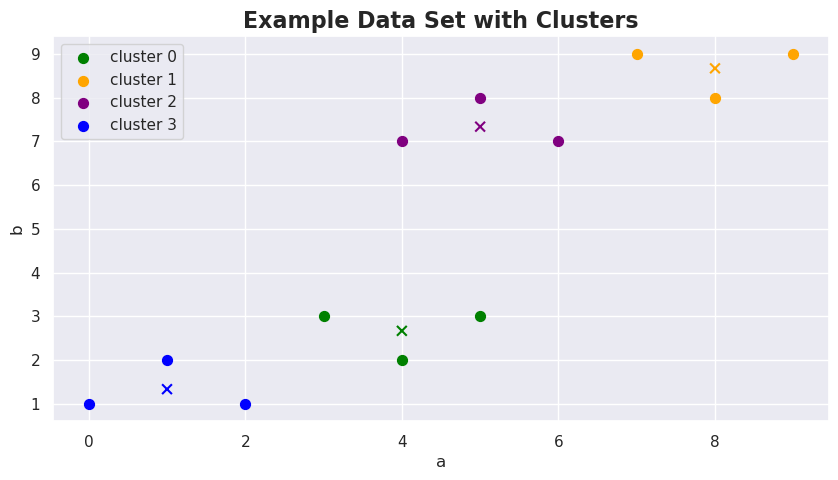

In [58]:
ax = X_km[X_km['cluster']==0].plot(kind='scatter', x='a', y='b', s=50, c='green')
X_km[X_km['cluster']==1].plot(kind='scatter',x='a',y='b',s=50, c='orange', ax = ax)
X_km[X_km['cluster']==2].plot(kind='scatter',x='a',y='b',s=50, c='purple', ax = ax)
X_km[X_km['cluster']==3].plot(kind='scatter',x='a',y='b',s=50, c='blue', ax = ax)

centers.plot(kind = 'scatter', x='a', y='b', c=['green','orange','purple','blue'], s=50, marker='x', ax=ax)
ax.legend(["cluster 0", "cluster 1", "cluster 2", "cluster 3"])
ax.set_title("Example Data Set with Clusters", weight='bold', size=16);

### Step 6. Make Predictions

Given one or more additional data points, you can find their clusters,
i.e., the label of the nearest cluster center, with the function **`predict()`**.

In [59]:
test_km = [(1, 4), (2, 4), (4, 6), (5, 4), (7, 6), (8, 8)]
km.predict(test_km)

array([3, 0, 2, 0, 2, 1], dtype=int32)

Check these predictions. It may be helpful to consult the following plot
(its creation is beyond the scope of these lessons),
which shows the cluster (color) predicted by `km.predict()`
for all points in the plot area.

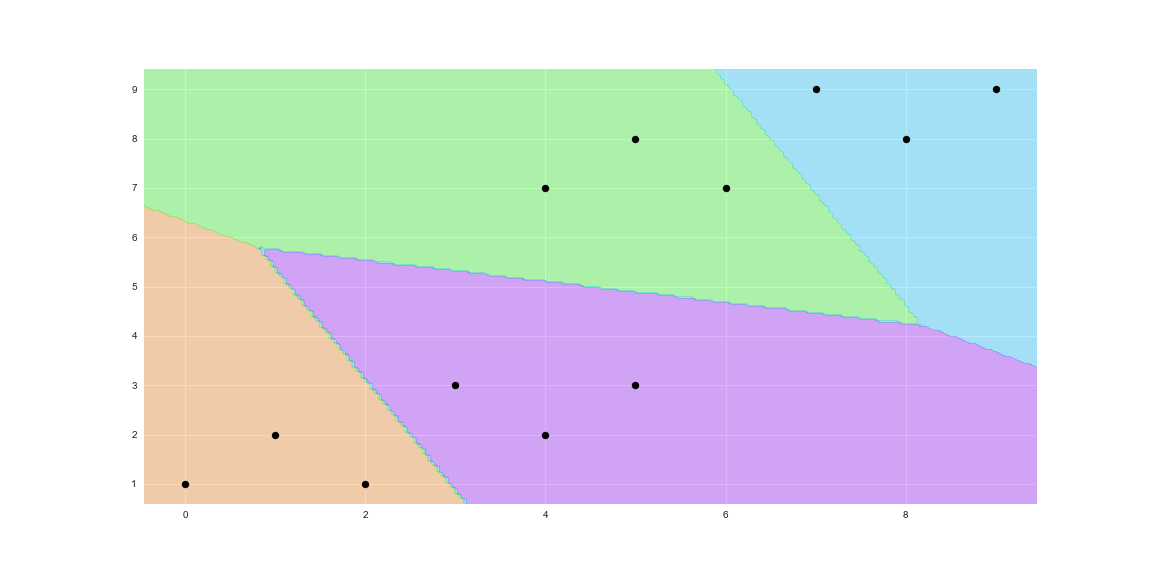

### Step 7. Assess the Model's Quality

For clustering, a quality measure is the _sum of squared distances_ of data points
to their closest cluster center, also known as _inertia_.
Its value is non-negative, and 0 is the best.

It is obtained as follows.

In [60]:
inertia = km.inertia_
inertia

10.666666666666668

> **Warning**: The inertia will always go down if you create more clusters, similarly to how the value of $R^2$ for linear regression always goes up if you add more independent variables. Again, this does _not_ mean that more clusters are always better: at some point, every point will just have its own cluster, and the clustering becomes meaningless.

## Exercises on Clustering

In this exercise, we will attempt to identify different types of *wheat seeds*, by clustering on their geometrical properties. We will use the data in `df_seeds`.

### Exercise 3.a: Cluster the Wheat Seeds 

Cluster the wheat seed data with the $k$-means algorithm with $k$ set to $3$. Perform the following steps:

**Step 1. Select the data**

* Copy the entire `df_seeds` data frame to a data frame `X_seeds_train`.

**Step 2. Create the cluster object**

* Assign the cluster object to `km_seeds`.

**Step 3. Fit the model**

**Step 4. Extract the model parameters**

* Assign the cluster centers to `centers_seeds` as a data frame, with the independent variables as column names.
* Add a new column named `'cluster'` with the cluster labels to the data frame `X_seeds_train`.

In [125]:
#// BEGIN_TODO [DMM_3a] Mine 3 clusters (3 points)

X_seeds_train = df_seeds.copy()

km_seeds = KMeans(n_clusters=3)
km_seeds.fit(X_seeds_train)

centers_seeds = pd.DataFrame(km_seeds.cluster_centers_, columns = X_seeds_train.columns)
X_seeds_train['cluster'] = km_seeds.labels_

#// END_TODO [DMM_3a]

X_seeds_train.head(10)

,area,perimeter,kernel_length,kernel_width,asymmetry,groove_length,cluster
0,15.26,14.84,5.763,3.312,2.221,5.220,2
1,14.88,14.57,5.554,3.333,1.018,4.956,2
2,14.29,14.09,5.291,3.337,2.699,4.825,2
3,13.84,13.94,5.324,3.379,2.259,4.805,2
4,16.14,14.99,5.658,3.562,1.355,5.175,2
5,14.38,14.21,5.386,3.312,2.462,4.956,2
6,14.69,14.49,5.563,3.259,3.586,5.219,2
7,14.11,14.10,5.420,3.302,2.700,5.000,2
8,16.63,15.46,6.053,3.465,2.040,5.877,2
9,16.44,15.25,5.884,3.505,1.969,5.533,2


In [126]:
centers_seeds

,area,perimeter,kernel_length,kernel_width,asymmetry,groove_length
0,11.988659,13.284390,5.227427,2.880085,4.583927,5.074244
1,18.721803,16.297377,6.208934,3.722672,3.603590,6.066098
2,14.819104,14.537164,5.591015,3.299358,2.706585,5.217537


### Exercise 3.b: Visualize the Clusters

Plot the results in a scatter plot, with the `'asymmetry'` column on the $x$-axis, and the `'perimeter'` column on the $y$-axis. Display each cluster in a different color. In addition, put red 'x' markers at the cluster centers. 

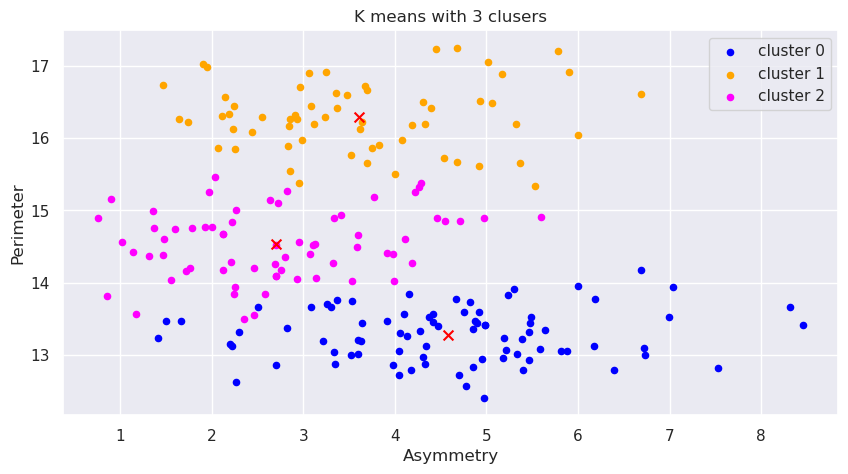

In [149]:
#// BEGIN_TODO [DMM_3b] Plot the clusters distinguished by color (2 points)

ax = X_seeds_train[X_seeds_train['cluster']==0].plot(kind='scatter', x='asymmetry', y='perimeter', c='blue')
X_seeds_train[X_seeds_train['cluster']==1].plot(kind='scatter', x='asymmetry', y='perimeter', c='orange', ax=ax)
X_seeds_train[X_seeds_train['cluster']==2].plot(kind='scatter', x='asymmetry', y='perimeter', c='magenta', ax=ax)
centers_seeds.plot(kind='scatter', x='asymmetry', y='perimeter', c='red', marker='x', ax=ax, s=50)

ax.legend(['cluster 0', 'cluster 1', 'cluster 2'])
ax.set_ylabel('Perimeter')
ax.set_xlabel('Asymmetry')
ax.set_title('K means with 3 clusers');

#// END_TODO [DMM_3b]

### Exercise 3.c: Make Predictions

Predict the cluster for seeds with the following geometrical properties
given in the data frame `X_seeds_test` below. Assign your answer to a new column `'predicted_cluster'` that you should add to `X_seeds_test`.

In [129]:
X_seeds_test = pd.DataFrame([[14.3, 14.0, 5.5, 3.1, 2.8, 4.9],
                             [16.5, 15.7, 6.3, 3.5, 3.4, 6.0],
                             [11.5, 13.0, 5.0, 2.7, 4.8, 5.0]],
                            columns=df_seeds.columns)

#// BEGIN_TODO [DMM_3c] Predict clusters (2 points)

X_seeds_test['predicted_cluster'] = km_seeds.predict(X_seeds_test)

#// END_TODO [DMM_3c]

X_seeds_test

,area,perimeter,kernel_length,kernel_width,asymmetry,groove_length,predicted_cluster
0,14.3,14.0,5.5,3.1,2.8,4.9,2
1,16.5,15.7,6.3,3.5,3.4,6.0,1
2,11.5,13.0,5.0,2.7,4.8,5.0,0


### Exercise 3.d: Assess the Model's Quality

Determine the model's _inertia_, and assign it to the variable `inertia_seeds`.

In [130]:
#// BEGIN_TODO [DMM_3d] Model quality (1 point)

inertia_seeds = km_seeds.inertia_
# 0 is the best

#// END_TODO [DMM_3d]

inertia_seeds

588.7108286015738

### Exercise 3.e: Compare with the Actual Seed Varieties

Using the $k$-means algorithm, we have identified our own types of wheat seeds. Clustering is an unsupervised learning technique, which is usually used when the data is not labeled. For this particular data set, however, the seeds actually come from three established wheat varieties. Let us see how our types compare to the varieties. 

The first seventy seeds in the data set were from the _Kama_ variety, the second seventy were _Rosa_ wheat seeds and the last seventy were _Canadian_ wheat seeds.

Add this information as strings in a column `'variety'` to the data frame `X_seeds_train`. Afterwards, we will compare the clusters with the variety labels.

In [131]:
#// BEGIN_TODO [DMM_3e] Add variety column (1 point)

X_seeds_train.loc[0:70, 'variety'] = 'Kama'
X_seeds_train.loc[70:140, 'variety'] = 'Rosa'
X_seeds_train.loc[140:210, 'variety'] = 'Canadian'

#// END_TODO [DMM_3e]

X_seeds_train

,area,perimeter,kernel_length,kernel_width,asymmetry,groove_length,cluster,variety
0,15.26,14.84,5.763,3.312,2.221,5.220,2,Kama
1,14.88,14.57,5.554,3.333,1.018,4.956,2,Kama
2,14.29,14.09,5.291,3.337,2.699,4.825,2,Kama
3,13.84,13.94,5.324,3.379,2.259,4.805,2,Kama
4,16.14,14.99,5.658,3.562,1.355,5.175,2,Kama
...,...,...,...,...,...,...,...,...
205,12.19,13.20,5.137,2.981,3.631,4.870,0,Canadian
206,11.23,12.88,5.140,2.795,4.325,5.003,0,Canadian
207,13.20,13.66,5.236,3.232,8.315,5.056,0,Canadian
208,11.84,13.21,5.175,2.836,3.598,5.044,0,Canadian


By executing the following cell, you can get some insight into how the clusters produced by the $k$-means algorithm compare to the established varieties.

In [132]:
X_seeds_train.groupby('cluster')['variety'].describe()

,count,unique,top,freq
cluster,,,,
0,82,2,Canadian,70
1,61,2,Rosa,60
2,67,2,Kama,57


If everything went well, you will see that there is actually quite a good correspondence!

---

# 4. Exercise: Different Models for Linear Regression


In the earlier exercises you were closely guided. In the following exercises we will put your knowledge to the test.

Note that these exercises may seem more difficult as you will need to work more indepedently. When you struggle with an exercise then go back to the corresponding earlier section and make sure you really understand the introduced concepts. Do not hesitate to experiment with your own code!


In Exercise 1, we fitted a linear model "explaining" `mpg` from `weight`. In this exercise, we will add more independent variables, and see whether the predictions become more accurate. 

### Exercise 4.a: Fit a Linear Model for `'mpg'` with a Cross Term and a Quadratic Term

The relationship between `mpg` and the `weight` may actually depend on the `horsepower`. Such dependencies can be captured with cross terms.

Fit a model with `mpg` as the dependent variable,
and four independent variables: `weight`, `horsepower`, `weight` $\times$ `horsepower`, and `weight`$^2$.

Which percentage of the variation in `mpg` is explained by the variation in these four factors?

Assign

* the training data for the independent variable to `X_mpg_ct_train`, with column names `'weight'`, `'horsepower'`, `'weight x hp'` and `'weight^2'`, using `df_mpg_train`;
* the test data for the independent variable to `X_mpg_ct_test` using `df_mpg_test`, with the same column names as `X_mpg_ct_train`;
* the fitted regression object to `reg_mpg_ct`;
* the coefficients to `coef_mpg_ct` (as an array);
* the intercept to `intercept_mpg_ct` (as a float);
* $R^2$ evaluated on the **training set** to `R2_mpg_ct`, and;
* the mean absolute error evaluated on the **test set** to `MAE_mpg_ct`.

In [136]:
#// BEGIN_TODO [DMM_4a] Model with cross term and quadratic term (5 points)

X_mpg_ct_train = df_mpg_train[['weight', 'horsepower']].copy()
X_mpg_ct_train['weight x hp'] = df_mpg_train['weight'] * df_mpg_train['horsepower']
X_mpg_ct_train['weight^2'] = df_mpg_train['weight']**2
y_mpg_ct_train = df_mpg_train['mpg']

X_mpg_ct_test = df_mpg_test[['weight', 'horsepower']].copy()
X_mpg_ct_test['weight x hp'] = df_mpg_test['weight'] * df_mpg_test['horsepower']
X_mpg_ct_test['weight^2'] = df_mpg_test['weight']**2
y_mpg_ct_test = df_mpg_test['mpg']

reg_mpg_ct = LinearRegression()
reg_mpg_ct.fit(X_mpg_ct_train, y_mpg_ct_train)

coef_mpg_ct = reg_mpg_ct.coef_
intercept_mpg_ct = reg_mpg_ct.intercept_
R2_mpg_ct = reg_mpg_ct.score(X_mpg_ct_train, y_mpg_ct_train)
MAE_mpg_ct = mean_absolute_error(y_mpg_ct_train, reg_mpg_ct.predict(X_mpg_ct_train))

#// END_TODO [DMM_4a]

coef_mpg_ct, intercept_mpg_ct, R2_mpg_ct, MAE_mpg_ct

(array([-1.11731527e-02, -2.72359565e-01,  5.99467290e-05, -7.79280144e-08]),
 np.float64(65.72416940113683),
 0.7695769440434705,
 np.float64(2.89566434821123))

### Exercise 4.b: Did the Goodness of Fit Improve?

Does this model have a better $R^2$ *on the training set* than the model with just the quadratic term? Assign your boolean answer to the variable `R2_improved_for_ct`.

In [137]:
#// BEGIN_TODO [DMM_4b] Did R2 on the training set improve? (1 point)

# 0.7383397890274057 OLD
# 0.7695769440434705 NEW
R2_improved_for_ct = True

#// END_TODO [DMM_4b]

R2_improved_for_ct

True

### Exercise 4.c: Did the Predictive Performance Improve?

Does this model have a better mean absolute error *on the test set* than the model with just the quadratic term from Exercise 1? Assign your boolean answer to the variable `MAE_improved_for_ct`.

In [138]:
#// BEGIN_TODO [DMM_4c] Did MAE on the test set improve? (2 points)

# 3.2270275167794367 OLD
# 2.89566434821123 NEW
MAE_improved_for_ct = True

#// END_TODO [DMM_4c]

MAE_improved_for_ct

True

# 5. Exercise: Depths of Decision Trees

In [Exercise 2.a](#Exercise-2.a), we have created a decision tree of depth 3 to classify cars into their origins. In this exercise, we will investigate what happens to the decision trees when we do not put a maximum on the depth of the tree.
We can decide how deep we allow a decision tree to be
by setting the appropriate parameter.

### Exercise 5.a: Fit a Decision Tree of Unbounded Maximum Depth

Let us see what happens if we leave the decision tree unbounded. Fit a decision tree with unspecified maximum depth to predict the `origin`. Assign the decision tree classifier to `dtc_unbdd`.

> **Hint:** Use `X_mpg_dtc_train` and `y_mpg_dtc_train` which you have defined earlier.

In [71]:
#// BEGIN_TODO [DMM_5a] Unbounded decision tree (2 points)

dtc_unbdd = DecisionTreeClassifier()
dtc_unbdd.fit(X_mpg_dtc_train, y_mpg_dtc_train)

#// END_TODO [DMM_5a]

tree_print(dtc_unbdd, X_mpg_dtc_train)

if displacement =< 134.5: 
  |then if displacement =< 97.25: 
  |  |then if acceleration =< 19.449999809265137: 
  |  |  |then if acceleration =< 14.949999809265137: 
  |  |  |  |then if year =< 73.0: 
  |  |  |  |  |then Japanese
  |  |  |  |  |else if year =< 79.5: 
  |  |  |  |  |  |then if year =< 74.5: 
  |  |  |  |  |  |  |then if displacement =< 93.5: 
  |  |  |  |  |  |  |  |then American
  |  |  |  |  |  |  |  |else European
  |  |  |  |  |  |  |else European
  |  |  |  |  |  |else Japanese
  |  |  |  |else if mpg =< 27.5: 
  |  |  |  |  |then if weight =< 2031.5: 
  |  |  |  |  |  |then European
  |  |  |  |  |  |else if displacement =< 93.5: 
  |  |  |  |  |  |  |then European
  |  |  |  |  |  |  |else Japanese
  |  |  |  |  |else if weight =< 2179.5: 
  |  |  |  |  |  |then if weight =< 1910.0: 
  |  |  |  |  |  |  |then if weight =< 1810.0: 
  |  |  |  |  |  |  |  |then Japanese
  |  |  |  |  |  |  |  |else if year =< 80.5: 
  |  |  |  |  |  |  |  |  |then European
  |  | 

### Exercise 5.b: Extract Model Parameters

Which depth level does the tree reach? Assign your integer answer to the variable `depth_level_tree`.

> **Hint:** You may simply look at the tree and provide a number.

In [72]:
#// BEGIN_TODO [DMM_5b] Depth of unbounded tree (1 point)

depth_level_tree = 12

#// END_TODO [DMM_5b]

depth_level_tree

12

### Exercise 5.c: Assess the Goodness of Fit

Does the tree of [Exercise 5.a: Fit a Decision Tree of Unbounded Maximum Depth](#Exercise-5.a:-Fit-a-Decision-Tree-of-Unbounded-Maximum-Depth) make any mistakes on the training set?

Assign

* the predicted classification for all cars in the _training data set_ to the variable `y_pred_unbdd_train`, and;
* the accuracy of the tree for the _training data set_ to `accuracy_unbdd_train`.

In [92]:
#// BEGIN_TODO [DMM_5c] Training set accuracy for unbounded tree (3 points)

y_pred_unbdd_train = dtc_unbdd.predict(X_mpg_dtc_train)
accuracy_unbdd_train = dtc_unbdd.score(X_mpg_dtc_train, y_mpg_dtc_train)

#// END_TODO [DMM_5c]

accuracy_unbdd_train

1.0

### Exercise 5.d: Assess the Predictive Performance

The unbounded depth tree performs well on the training data set. But how good is it for predicting the origin of cars for data it has not seen before? 

Compute the accuracy of the predictions of the unbounded decision tree on the test set.

Assign

* the predicted classification for all cars in the _test data set_ to the variable `y_pred_unbdd_test`, and;
* the accuracy of the tree for the _test data set_ to `accuracy_unbdd_test`.

In [93]:
#// BEGIN_TODO [DMM_5d] Test set accuracy for unbounded tree (3 points)

y_pred_unbdd_test = dtc_unbdd.predict(X_mpg_dtc_test)
accuracy_unbdd_test = dtc_unbdd.score(X_mpg_dtc_test, y_mpg_dtc_test)

#// END_TODO [DMM_5d]

accuracy_unbdd_test

0.7875

### Exercise 5.e: Which Tree is More Appropriate?

Which of the trees we have considered in this exercise, and Exercise 2, is more appropriate and why?

>a. The unbounded tree, because it makes the least mistakes.
>
>b. The tree of depth 3, because it has a better balance between accuracy and simplicity.

Assign your answer (string `'a'` or `'b'`) to the variable `more_appropriate_tree`.

In [94]:
#// BEGIN_TODO [DMM_5e] Most appropriate tree? (1 point)

more_appropriate_tree = 'b'

#// END_TODO [DMM_5e]

more_appropriate_tree

'b'

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [96]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)
feedback_time = 4
#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

4

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [97]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)
feedback_difficulty = 3.5
#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

3.5

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology